<a href="https://colab.research.google.com/github/parviza9999/GEN_AI_IK/blob/main/LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langchain-chroma langchain-openai
!pip install beautifulsoup4
!pip install langchain-community
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 68.8 MB/s eta 0:00

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.5
    Uninstalling langchain-text-splitters-0.3.5:
      Successfully uninstalled langchain-text-splitters-0.3.5
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.17
    Uninstalling langchain-0.3.17:
      Successfully uninstalled langchain-0.3.17
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 31.8 MB/s eta 0:00:00


In [ ]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Simple LLM Call

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(api_key=os.environ["OPENAI_API_KEY"])

In [ ]:
answer = llm.invoke("how can langsmith help with testing?")

In [ ]:
print(answer)

content='Langsmith can help with testing in several ways:\n\n1. Automated Testing: Langsmith can be used to write automated test scripts for your software application. These scripts can help run tests quickly and accurately, saving time and effort compared to manual testing.\n\n2. Language Testing: Langsmith can be used to test different language features and functionality, ensuring that the software application behaves as expected in different language settings.\n\n3. Performance Testing: Langsmith can be utilized to perform performance testing on your application, helping to identify bottlenecks and areas for optimization.\n\n4. Compatibility Testing: Langsmith can assist in testing the compatibility of your application with different operating systems, browsers, and devices.\n\n5. Regression Testing: Langsmith can be used to create and execute regression tests to ensure that new changes do not negatively impact existing features.\n\nOverall, Langsmith can be a valuable tool in autom

# That's not very interesting ... and there is no chaining anyways

# Let's Do Some Chaining

## Templating

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

template = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot. Your name is {name}."),
    ("human", "Hello, how are you doing?"),
    ("ai", "I'm doing well, thanks!"),
    ("human", "{user_input}"),
])

prompt_value = template.invoke(
    {
        "name": "Bob",
        "user_input": "What is your name?"
    }
)
# Output:
# ChatPromptValue(
#    messages=[
#        SystemMessage(content='You are a helpful AI bot. Your name is Bob.'),
#        HumanMessage(content='Hello, how are you doing?'),
#        AIMessage(content="I'm doing well, thanks!"),
#        HumanMessage(content='What is your name?')
#    ]
#)

In [ ]:
for msg in prompt_value.messages:
  print(type(msg).__name__, ":", msg.content)

SystemMessage : You are a helpful AI bot. Your name is Bob.
HumanMessage : Hello, how are you doing?
AIMessage : I'm doing well, thanks!
HumanMessage : What is your name?


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a world class technical documentation writer."), # system instructions
    ("user", "{input}")
])

In [ ]:
for msg in prompt.messages:
  print(type(msg).__name__, ":", msg)

SystemMessagePromptTemplate : prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a world class technical documentation writer.') additional_kwargs={}
HumanMessagePromptTemplate : prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}') additional_kwargs={}


## Chaining

In [ ]:
chain = prompt | llm
## pass the prompt to the LLM

In [ ]:
print(chain.first)

input_variables=['input'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a world class technical documentation writer.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]


In [ ]:
chain_result = chain.invoke({"input": "how can langsmith help with testing?"})

"system": "You are a world class technical documentation writer."

"user", "how can langsmith help with testing?"

In [ ]:
print(chain_result.content)

Langsmith is a powerful tool that can greatly assist with testing by providing automated language detection capabilities. By using Langsmith in your testing processes, you can quickly identify the language of text inputs or outputs, which can be crucial for internationalization and localization testing.

Here are some ways Langsmith can help with testing:

1. **Language Detection**: Langsmith can automatically detect the language of text strings, making it easier to verify that the correct language is being used in your application or website.

2. **Internationalization Testing**: Langsmith can help ensure that your application is properly internationalized by detecting the language of user inputs or content displayed to users.

3. **Localization Testing**: By detecting the language of text strings, Langsmith can assist in verifying the accuracy of language translations and localized content.

4. **Content Testing**: Langsmith can be used to check that content is correctly identified a

In [ ]:
print(chain_result.response_metadata)

{'token_usage': {'completion_tokens': 226, 'prompt_tokens': 28, 'total_tokens': 254, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}


# More Chaining

In [ ]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

In [ ]:
chain = prompt | llm | output_parser

In [ ]:
chain_result = chain.invoke({"input": "how can langsmith help with testing?"})

In [ ]:
print(chain_result)

Langsmith can help with testing by providing a platform for automated testing of language-related features in software applications. It offers a range of tools and utilities designed to assist developers and testers in verifying the correctness and functionality of language-specific components such as syntax highlighting, auto-completion, formatting, internationalization, and localization.

Here are some ways in which Langsmith can be useful for testing:

1. Automated testing: Langsmith enables the automation of tests for language-related features, allowing for faster and more efficient validation of code correctness and functionality. This can help in identifying bugs and regressions early in the development process.

2. Language support validation: Langsmith can be used to validate the language support of an application by checking if syntax highlighting, auto-completion, and other language-specific features work correctly and consistently across different platforms and environments.

# Where are the retrieval from <u>**R**</u>AG

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://docs.smith.langchain.com/user_guide")

docs = loader.load()

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(docs)
vector = FAISS.from_documents(documents, embeddings)

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain
# create_stuff_documents_chain :
#  Create a chain for passing a list of Documents to a model.

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""", output_parser = output_parser)

document_chain = create_stuff_documents_chain(llm, prompt)
# document_chain = prompt | llm

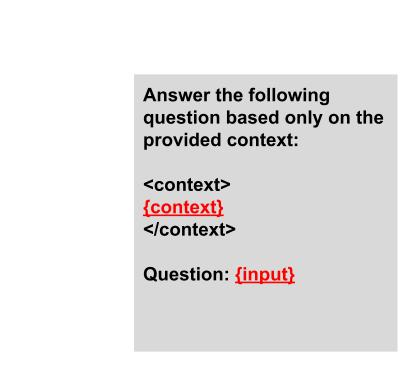

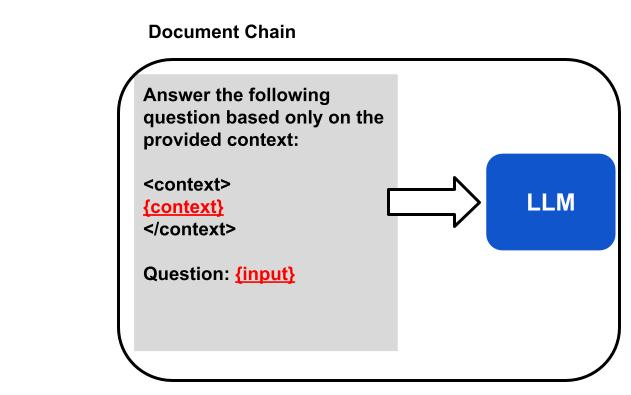

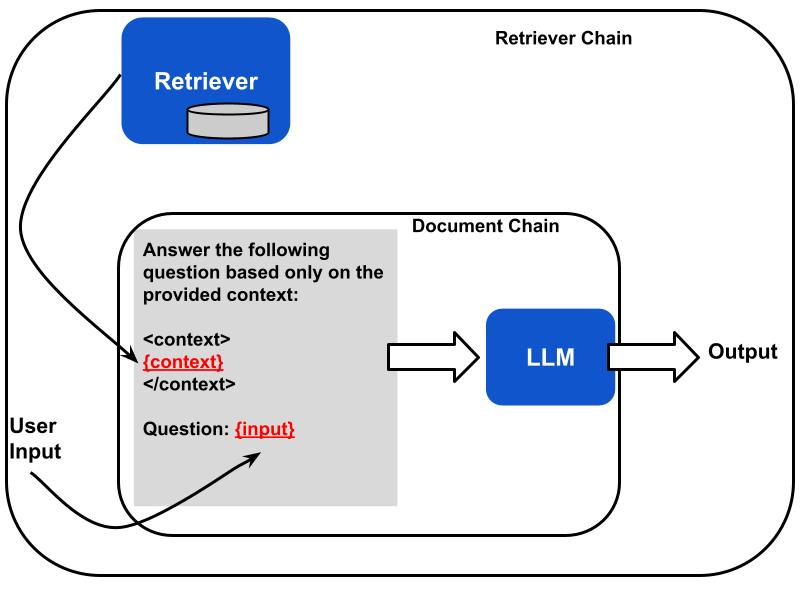

In [ ]:
from langchain.chains import create_retrieval_chain

retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [ ]:
response = retrieval_chain.invoke({"input": "how can langsmith help with testing?"})

In [ ]:
print(response["answer"])

# LangSmith offers several features that can help with testing:...

LangSmith provides various features to assist with testing LLM applications. These include:
- Prototyping: allowing quick experimentation between prompts, model types, retrieval strategy, and other parameters.
- Debugging: providing clear visibility and debugging information at each step of an LLM sequence to identify and root-cause issues.
- Initial Test Set: enabling developers to create datasets of inputs and reference outputs to run tests on their LLM applications.
- Comparison View: facilitating the comparison of results for different configurations on the same datapoints to track and diagnose regressions in test scores across multiple revisions.
- Playground: offering a playground environment for rapid iteration and experimentation with different prompts and models.
- Beta Testing: collecting more data on how LLM applications perform in real-world scenarios to track regressions/improvements and develop automatic evaluations.
- Capturing Feedback: allowing developers to gather hum

In [ ]:
response = retrieval_chain.invoke({"input": "how can use it?"})
print(response["answer"])

You can use LangSmith for beta testing, capturing feedback, annotating traces, adding runs to a dataset, monitoring and A/B testing, automations, prototyping, debugging, creating initial test sets, comparison view, and using the playground environment for rapid iteration and experimentation.
